# MA 116 B1 Simple Linear Regression Demo


In [1]:
#import sys
#print(sys.executable)

C:\Users\cesai\OneDrive\Jupyter_Files\stat\.venv\Scripts\python.exe


In [76]:
import numpy as np
import matplotlib.pyplot as plt


from scipy.optimize import minimize

xi = np.array([1, 2, 3, 4, 5])
yi = np.array([2, 3, 5, 4, 6])

# Define the objective function to minimize (sum of squared residuals)
def sum_of_squares(twoparams):
    s, t = twoparams
    y_pred = s * xi + t
    residuals = yi - y_pred
    return np.sum(residuals**2)

def least_squares_regression(x, y):
    """
    Calculate the least squares regression line by minimizing the sum of squared residuals.
    
    Parameters:
    x (array-like): Independent variable values
    y (array-like): Dependent variable values
    
    Returns:
    tuple: (s, t) of the regression line
    """

    
    # Initial guess for slope and intercept
    initial_guess = np.array([1.0, 0.1])
    
    # Minimize the sum of squares
    result = minimize(sum_of_squares, initial_guess) #method='Nelder-Mead'
    
    if result.success:
        slope, intercept = result.x
        return slope, intercept
    else:
        raise ValueError("Optimization failed: " + result.message)

In [35]:
b1, b0 = least_squares_regression(xi, yi)
print("y= {:.3f} x + {:.3f}".format(b1, b0)) # numerical solution

y= 0.900 x + 1.300


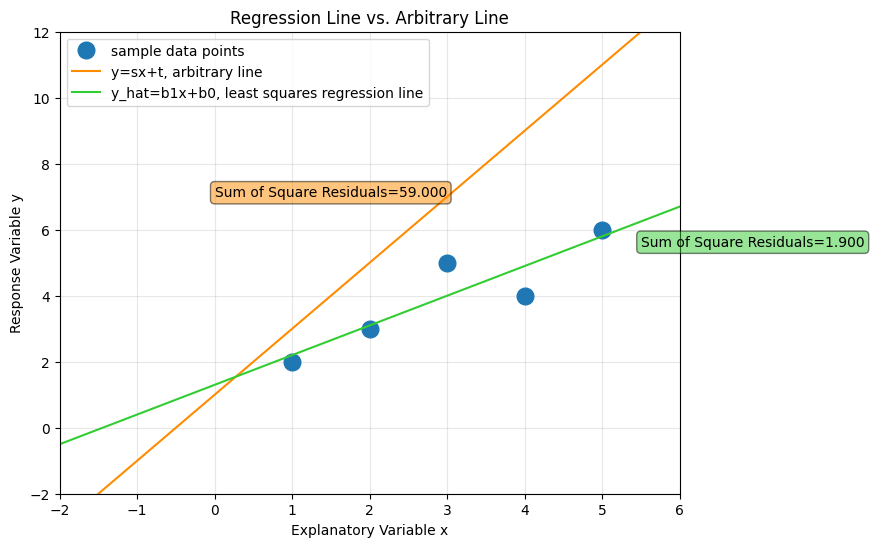

In [75]:
s = 2
t = 1

# Create the plot
plt.figure(figsize=(8, 6))
plt.xlim(-2, 6)    
plt.ylim(-2, 12)
plt.plot(xi, yi, marker='o', linestyle='', markersize=12, label='sample data points')

x = np.linspace(-2, 6, 100)
f = s * x + t
plt.plot(x, f, color='darkorange', marker='', linestyle='-', markersize=1, label='y=sx+t, arbitrary line')
y_hat = b1 * x + b0
plt.plot(x, y_hat, color='limegreen', marker='', linestyle='-', markersize=1, label='y_hat=b1x+b0, least squares regression line')

# Compare sum of square residuals
f_sosr     = sum_of_squares([s, t])
y_hat_sosr = sum_of_squares([b1, b0])
plt.text(5.5, 5.5, 'Sum of Square Residuals={:.3f}'.format(y_hat_sosr), 
         fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="limegreen", alpha=0.5))
plt.text(0, 7, 'Sum of Square Residuals={:.3f}'.format(f_sosr), 
         fontsize=10, 
         bbox=dict(boxstyle="round,pad=0.3", facecolor="darkorange", alpha=0.5))


# Add labels and title
plt.xlabel('Explanatory Variable x')
plt.ylabel('Response Variable y')
plt.title('Regression Line vs. Arbitrary Line')

# Add grid
plt.grid(True, alpha=0.3)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [14]:
# Compare with numpy's built-in least squares for verification, some linear algebra techniques
A = np.vstack([x, np.ones(len(x))]).T
m_np, c_np = np.linalg.lstsq(A, y, rcond=None)[0]
print("Numpy verification: y = {:.3f}x + {:.3f}".format(m_np, c_np)) # analytical solution

Numpy verification: y = 0.900x + 1.300


In [15]:
# Compare with simple linear regression formulas for verification
x_bar = np.mean(x)
y_bar = np.mean(y)
s_x   = np.std(x, ddof=1)
s_y   = np.std(y, ddof=1)
n     = np.size(x)

    
r  = np.sum( (x-x_bar) @ (y-y_bar) ) / (s_x * s_y * (n-1) )
b1 = r * s_y / s_x
b0 = y_bar - b1 * x_bar
print("The linear correlation coefficient is r={:.3f}.".format(r))
print("Formula solution: y = {:.3f}x + {:.3f}".format(b1, b0)) # formula solution

The linear correlation coefficient is r=0.900.
Formula solution: y = 0.900x + 1.300
